In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split #train test package
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import sklearn.metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
file_path = 'C:/Users/jpadmanabhan/Downloads/WineQT.csv'
df = pd.read_csv(file_path)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [4]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [5]:
df.corrwith(df["quality"])

fixed acidity           0.121970
volatile acidity       -0.407394
citric acid             0.240821
residual sugar          0.022002
chlorides              -0.124085
free sulfur dioxide    -0.063260
total sulfur dioxide   -0.183339
density                -0.175208
pH                     -0.052453
sulphates               0.257710
alcohol                 0.484866
quality                 1.000000
Id                      0.069708
dtype: float64

In [6]:
x = df.drop(['quality'], axis=1)
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,4


In [7]:
y = df['quality'].apply(lambda y_value: 1 if y_value>=6.5 else 0)
y.head()

0    0
1    0
2    0
3    0
4    0
Name: quality, dtype: int64

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=20)
x_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
547,9.1,0.68,0.11,2.8,0.093,11.0,44.0,0.99888,3.31,0.55,9.5,764
837,6.7,0.64,0.23,2.1,0.080,11.0,119.0,0.99538,3.36,0.70,10.9,1184
597,6.7,0.28,0.28,2.4,0.012,36.0,100.0,0.99064,3.26,0.39,11.7,836
440,10.0,0.58,0.22,1.9,0.080,9.0,32.0,0.99740,3.13,0.55,9.5,622
197,10.3,0.32,0.45,6.4,0.073,5.0,13.0,0.99760,3.23,0.82,12.6,278


In [9]:
model1 = LogisticRegression(max_iter=30000)
model1.fit(x_train, y_train)

LogisticRegression(max_iter=30000)

In [29]:
#features = ['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides','total sulfur dioxide','density','sulphates','alcohol']

dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)


DecisionTreeClassifier()

In [30]:
data = list(zip(x, y))
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [31]:
model4 = RandomForestClassifier()
model4.fit(x_train, y_train)

RandomForestClassifier()

In [32]:
y_predict4 = model4.predict(x_test)
y_predict4
accuracy = sklearn.metrics.accuracy_score(y_test, y_predict4)
accuracy

0.8908296943231441

In [33]:
y_predict3 = knn.predict(x_test)
y_predict3
accuracy = sklearn.metrics.accuracy_score(y_test, y_predict3)
accuracy

0.8253275109170306

In [34]:
y_predict2 = dtree.predict(x_test)
y_predict2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [35]:
accuracy = sklearn.metrics.accuracy_score(y_test, y_predict2)
accuracy

0.851528384279476

In [36]:
y_predict1 = model1.predict(x_test)

In [37]:
y_predict1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [38]:
cm = confusion_matrix(y_test, y_predict1)
cm

array([[195,   4],
       [ 21,   9]], dtype=int64)

<Figure size 720x504 with 0 Axes>

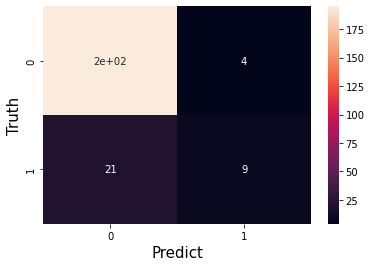

<Figure size 720x504 with 0 Axes>

In [39]:
sns.heatmap(cm, annot=True)
plt.xlabel('Predict', fontsize=15)
plt.ylabel('Truth', fontsize=15)
plt.figure(figsize=(10, 7))

In [40]:
fixed_acidity = 11.2
volatile_acidity = 0.28
citric_acid = 0.56
residual_sugar = 1.9
chlorides = 0.075
free_sulfur_dioxide = 17
total_sulfur_dioxide = 60
density = 0.998
pH = 3.16
sulphates = 0.58
alcohol = 9.8

In [41]:
user_input = x
user_input.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,4


In [42]:
user_input = user_input.drop(range(0,1143))

In [43]:
#user_input.loc[0] = [fixed_acidity] + [volatile_acidity] + [citric_acid] + [chlorides] + [total_sulfur_dioxide] + [density] + [sulphates] + [alcohol]

In [44]:
user_input

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id


In [45]:
accuracy = sklearn.metrics.accuracy_score(y_test, y_predict1)

In [46]:
accuracy

0.8908296943231441

In [ ]:
#df = df.replace({'sentiment': {'Negative': 0, 'Positive': 1, 'Neutral': 2, 'Irrelevant': 3}})